In [1]:
# all visualisations can be animated on Tableau, any suggestions on colors, descriptions, 
# check of numbers, etc. are welcome

In [2]:
# Data Preparation (5%) - The data set was cleaned, formatted, and prepared for analysis in an exemplary way.

In [3]:
# source U.S. State-Level Data](us-states.csv) ([Raw CSV](https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv))

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [6]:
!ls "/content/drive/My Drive/S76/"

us.csv	us-states.csv


In [7]:
source = '/content/drive/My Drive/S76/us-states.csv'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
data = pd.read_csv(source, index_col='date',
                 parse_dates=True, dayfirst=True)

In [10]:
data.head(2)

,state,fips,cases,deaths
date,,,,
2020-01-21,Washington,53,1,0
2020-01-22,Washington,53,1,0


In [11]:
data.tail(2)

,state,fips,cases,deaths
date,,,,
2020-06-24,Wisconsin,55,25922,762
2020-06-24,Wyoming,56,1282,20


In [12]:
data.shape

(6284, 4)

In [13]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,fips,cases,deaths
count,6284.000000,6284.000000,6284.000000
mean,31.683482,18479.762253,1026.485678
std,18.517537,44439.736339,3233.562525
min,1.000000,1.000000,0.000000
25%,17.000000,377.000000,6.000000
50%,31.000000,3398.000000,94.000000
75%,46.000000,16585.750000,625.500000
max,78.000000,394430.000000,31001.000000


In [14]:
data.isnull().values.any()

False

In [15]:
data.isnull().sum()

state     0
fips      0
cases     0
deaths    0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6284 entries, 2020-01-21 to 2020-06-24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   state   6284 non-null   object
 1   fips    6284 non-null   int64 
 2   cases   6284 non-null   int64 
 3   deaths  6284 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 245.5+ KB


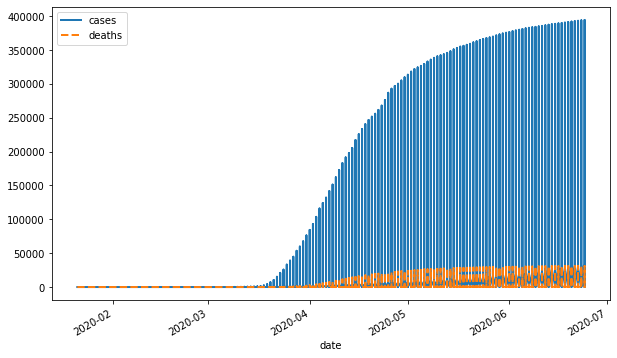

In [17]:
data[['cases', 'deaths']].plot(figsize=(10, 6),
                               style=['-', '--'],
                               lw=2)

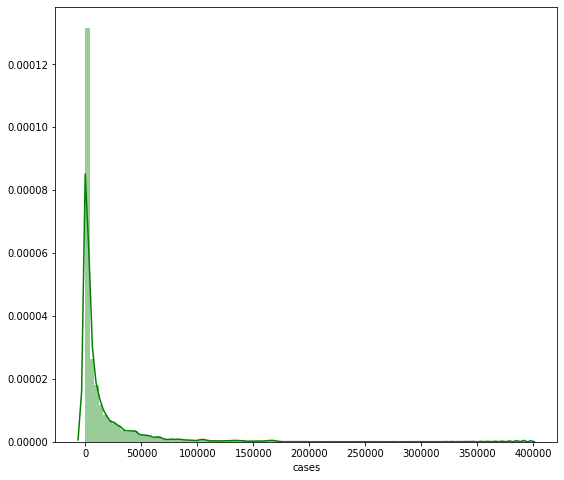

In [18]:
plt.figure(figsize=(9, 8))
sns.distplot(data['cases'], color='g', bins=100, hist_kws={'alpha': 0.4});

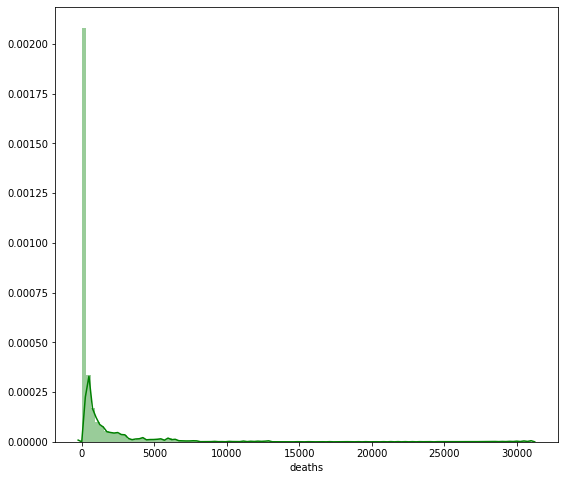

In [19]:
plt.figure(figsize=(9, 8))
sns.distplot(data['deaths'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [22]:
data1 = data.drop(['fips'], axis=1)

In [23]:
data1.corr()

,cases,deaths
cases,1.000000,0.970802
deaths,0.970802,1.000000


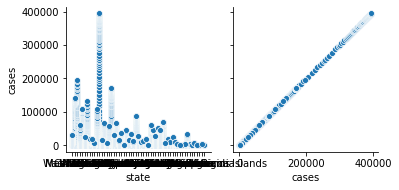

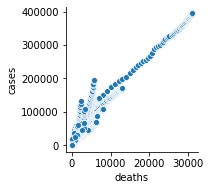

In [24]:
for i in range(0, len(data1.columns), 2):
    sns.pairplot(data=data1,
                x_vars=data1.columns[i:i+2],
                y_vars=['cases'])

In [27]:
states = set(data1.state)


In [28]:
states

{'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Guam',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Northern Mariana Islands',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virgin Islands',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming'}

In [34]:
len(states)

55

In [36]:
data_state = data1.groupby(['state']).sum()


In [37]:
data_state

,cases,deaths
state,,
Alabama,1090480,36700
Alaska,38064,644
Arizona,1421783,52912
Arkansas,492826,8528
California,7009369,250764
Colorado,1636945,85624
Connecticut,2677222,230573
Delaware,544218,20270
District of Columbia,519380,26136


In [41]:
data_state['death_rate'] = (data_state['deaths'] / data_state['cases'])


In [43]:
data_state.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,cases,deaths,death_rate
count,55.000000,55.000000,55.000000
mean,2111396.836364,117280.654545,0.041516
std,4016584.355931,291514.848849,0.020138
min,1634.000000,164.000000,0.005904
25%,283752.000000,7516.000000,0.027971
50%,876388.000000,28128.000000,0.038266
75%,2280003.000000,111472.500000,0.050469
max,26918515.000000,2018407.000000,0.100367


(0.0, 28264440.74970478)

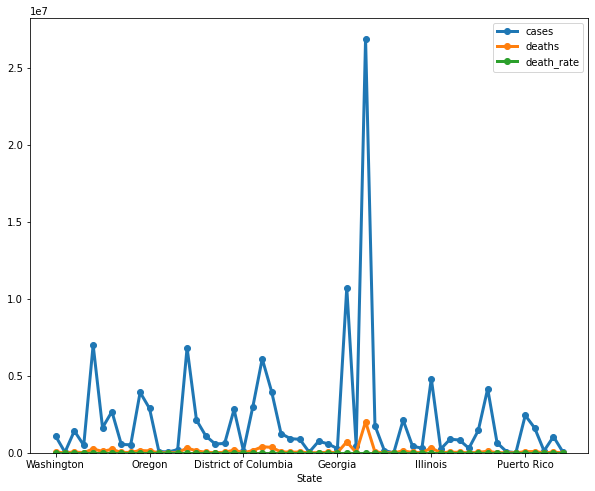

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
data_state.plot(style='-o', lw=3, ax=ax)
ax.set_xlabel('State')
# We replace the labels 0, 1, 2... by the weekday
# names.
ax.set_xticklabels(
    (states))
ax.set_ylim(0)  # Set the bottom axis to 0.

In [50]:
data_state = data_state.sort_values(by=['death_rate'])

In [51]:
data_state.head()

,cases,deaths,death_rate
state,,,
Guam,84174,497,0.005904
Utah,647762,6504,0.010041
South Dakota,294012,3255,0.011071
Nebraska,747567,10016,0.013398
Wyoming,59802,817,0.013662


In [52]:
data_state.tail()

,cases,deaths,death_rate
state,,,
New Jersey,10734065,711892,0.066321
New York,26918515,2018407,0.074982
Connecticut,2677222,230573,0.086124
Michigan,3978095,351949,0.088472
Northern Mariana Islands,1634,164,0.100367


In [80]:
from sklearn.cluster import KMeans

In [82]:
df = pd.DataFrame(data_state,columns=['cases','deaths'])

In [92]:
kmeans = KMeans(n_clusters=10).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

[[1.30675625e+05 3.96943750e+03]
 [2.69185150e+07 2.01840700e+06]
 [4.22258575e+06 2.28563000e+05]
 [6.64832933e+06 3.18837667e+05]
 [2.22871400e+06 1.08005667e+05]
 [9.99388750e+05 3.88303750e+04]
 [1.07340650e+07 7.11892000e+05]
 [2.84287950e+06 1.69738750e+05]
 [1.57800640e+06 5.86818000e+04]
 [5.60530300e+05 1.78837000e+04]]


In [98]:
from matplotlib.pyplot import figure


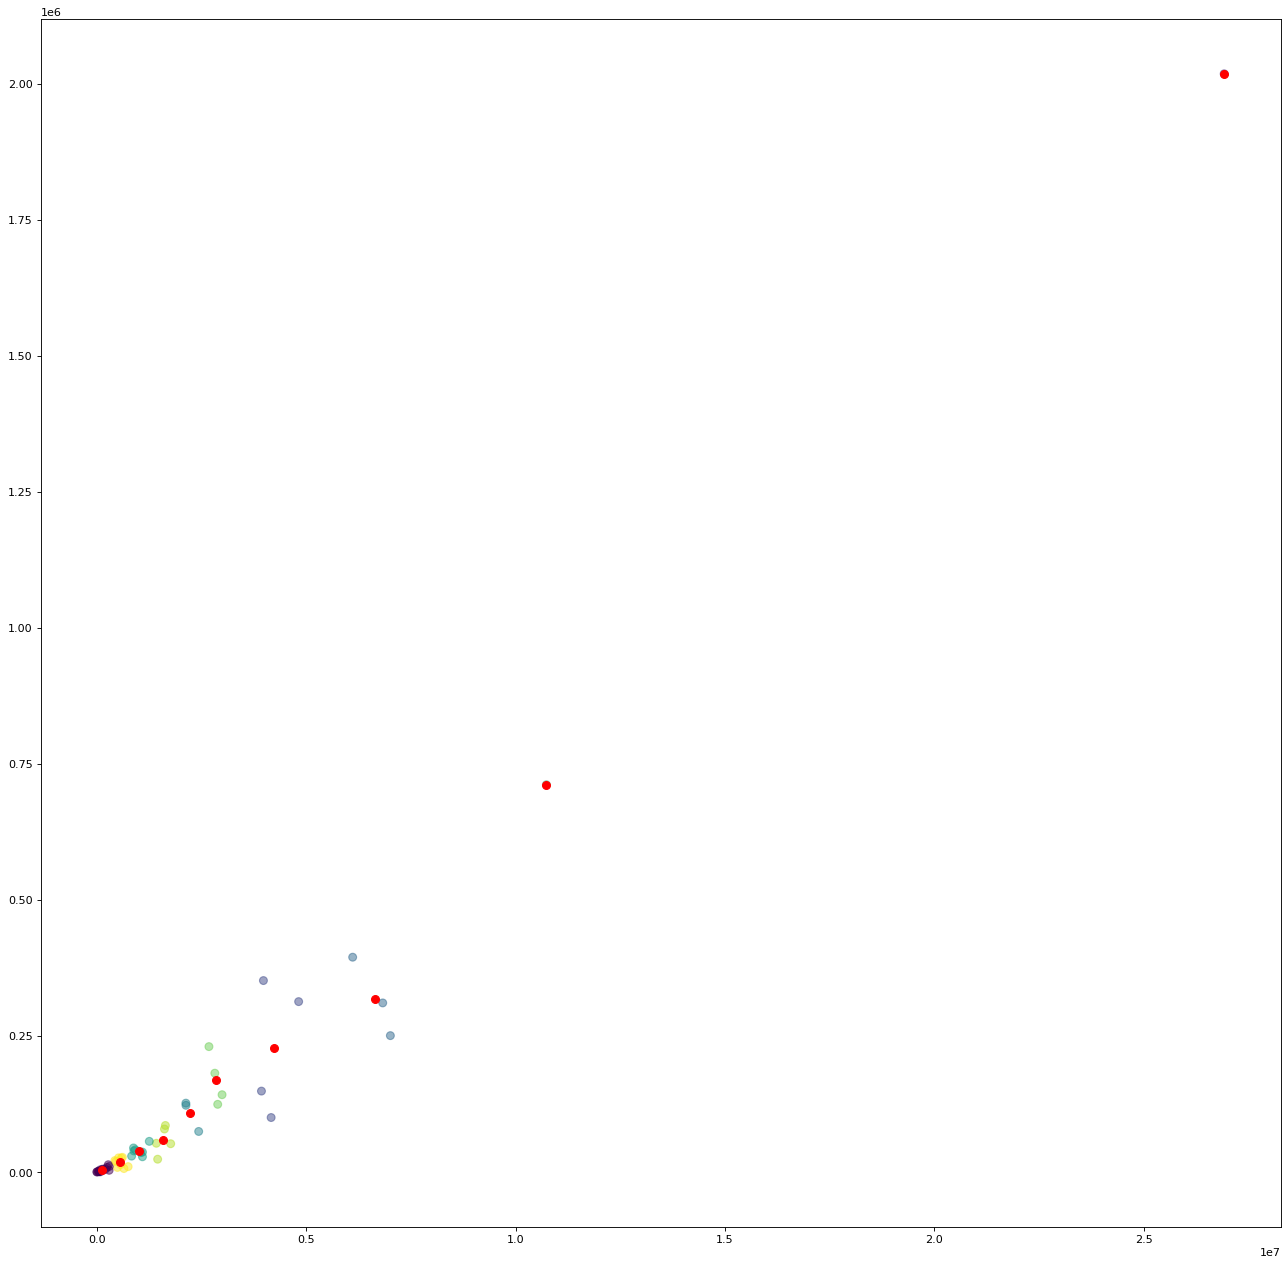

In [99]:
figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df['cases'], df['deaths'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [100]:
data_state.to_csv('data_state1.csv', index=False)

In [101]:
# Choice of Visualization (25%) - The chosen visualizations present an innovative solution 
#beyond being simply appropriate for the selected data structure - any ideas for Tableu? Animation?

In [102]:
# Consistency of Visual Language (25%) - The visualization is not only legible due to appropriate choice of colors, placement of visual forms, labeling, and annotation, 
# but demonstrates a high level of design competency - any suggestions for colors?

In [103]:
# Analysis in Post (20%) - Post includes a full analysis of questions about data, data sources, variables, methods, and findings. 
#Post includes insightful patterns, similarities, or differences.

In [104]:
# Writing (5%) - Uses clear language to accurately express ideas and explain concepts. 
# No errors related to organization, grammar, style, or citations.